# 1. 매장 규모 시각화

1. `data_coffee.csv` 데이터 사용
2. 매장의 규모(sizeOfsite) 변수를 이용
3. 결측치를 제거하고 히스토그램 그리기
4. 매장 규모가 500이상인 outlier를 제외하고 히스토그램 그리기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
coffee = pd.read_csv('./data/data_coffee.csv', encoding='ms949')
coffee.head()

,number,companyName,adress,adressBystreet,dateOflicensing,stateOfbusiness,dateOfclosure,startdateOfcessation,duedateOfcessation,dateOfreOpen,...,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
0,1,#11(Sharp eleven),서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44),"서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))",20080917,운영중,NaN,NaN,NaN,NaN,...,NaN,2008.0,N,NaN,20.80,NaN,NaN,휴게음식점,커피숍,NaN
1,2,( 주)커피빈코리아청주지웰시티점,"충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 12...","충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 1...",20101124,운영중,NaN,NaN,NaN,NaN,...,NaN,2010.0,N,NaN,212.72,NaN,NaN,휴게음식점,커피숍,NaN
2,3,(aA)더블에이,경상북도 경산시 사동 39번지 108-2호,"경상북도 경산시 백자로10길 3-11, 108-2호 (사동)",20130902,운영중,NaN,NaN,NaN,NaN,...,NaN,2013.0,N,NaN,20.04,NaN,아파트지역,휴게음식점,커피숍,NaN
3,4,(강서)카페치따,서울특별시 강서구 등촌동 63-12번지 외 2필지 어위쉬예다인 (지상 1층) 104호,"서울특별시 강서구 양천로 452, 1층 104호 (등촌동, 3동 어위쉬예다인)",20121108,운영중,NaN,NaN,NaN,NaN,...,NaN,2012.0,N,NaN,64.17,NaN,NaN,휴게음식점,커피숍,NaN
4,5,(로즈버드)명동아바타,서울특별시 중구 명동2가 83-5번지 (아바타1층1218),NaN,20020911,폐업 등,20071105.0,NaN,NaN,NaN,...,0.0,2002.0,N,NaN,11.40,0.0,NaN,휴게음식점,커피숍,0.0


In [9]:
coffee['sizeOfsite'].describe()

count    46813.000000
mean        75.531012
std        135.088745
min          0.000000
25%         28.120000
50%         50.000000
75%         93.750000
max      24075.000000
Name: sizeOfsite, dtype: float64

In [10]:
coffee['sizeOfsite'].isna().sum()

19

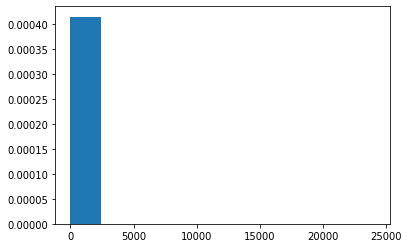

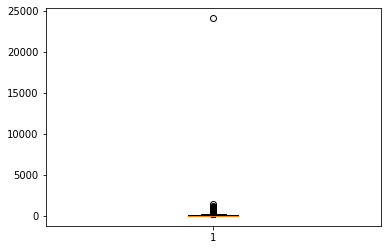

In [23]:
# 결측치 제거
coffee_rm_na = coffee['sizeOfsite'].dropna()

plt.subplots()
plt.hist(coffee_rm_na, density=True) # density=True : 상대 도수 

plt.subplots()
plt.boxplot(coffee_rm_na)
plt.show();

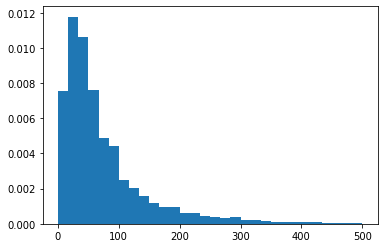

In [24]:
# outlier 제거
coffee_rm_outlier = coffee_rm_na[coffee_rm_na <= 500]

plt.hist(coffee_rm_outlier, bins=30, density=True)
plt.show();

# 2. 판매 실적

1. `data_officesupplies.csv`를 사용
2. Region을 West, Central, East로 구별하여 판매 수량(Units)를 다중 박스플롯으로 출력한다.

In [25]:
officesupp = pd.read_csv('./data/data_officesupplies.csv')
officesupp.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95


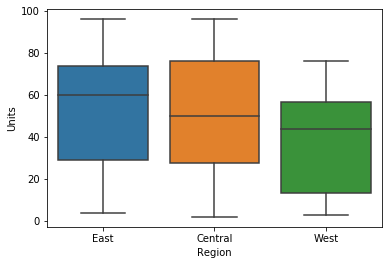

In [31]:
sns.boxplot(x='Region', y='Units', data=officesupp);

# 3. 혈액형과 신장

1. `data_studentlist_en.csv` 사용
2. 혈액형별 신장을 구한다.
    - groupby 사용
    - pivot_table 사용
   

In [32]:
data = pd.read_csv('./data/data_studentlist_en.csv')
data.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [37]:
height_by_bloodtype = data.groupby('bloodtype')[['height']].mean()
print(height_by_bloodtype)

            height
bloodtype         
A          169.075
AB         177.400
B          171.280
O          165.140


In [39]:
height_by_bloodtype.pivot_table(index='bloodtype', values='height')

,height
bloodtype,
A,169.075
AB,177.400
B,171.280
O,165.140


In [40]:
height_by_bloodtype.pivot_table(columns='bloodtype', values='height')

bloodtype,A,AB,B,O
height,169.075,177.4,171.28,165.14
